In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df.head()
df.shape
df['Category'].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

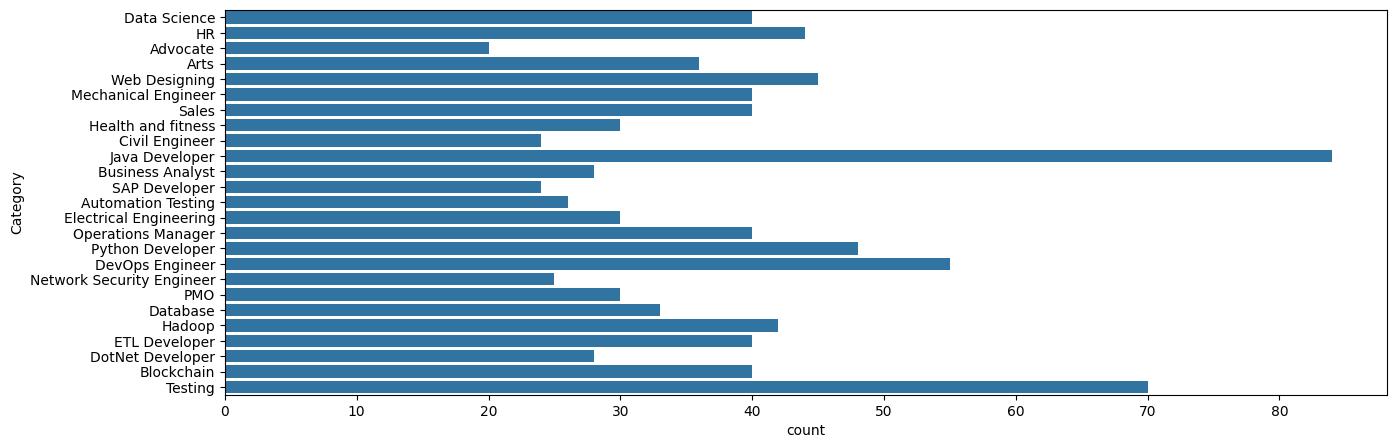

In [3]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

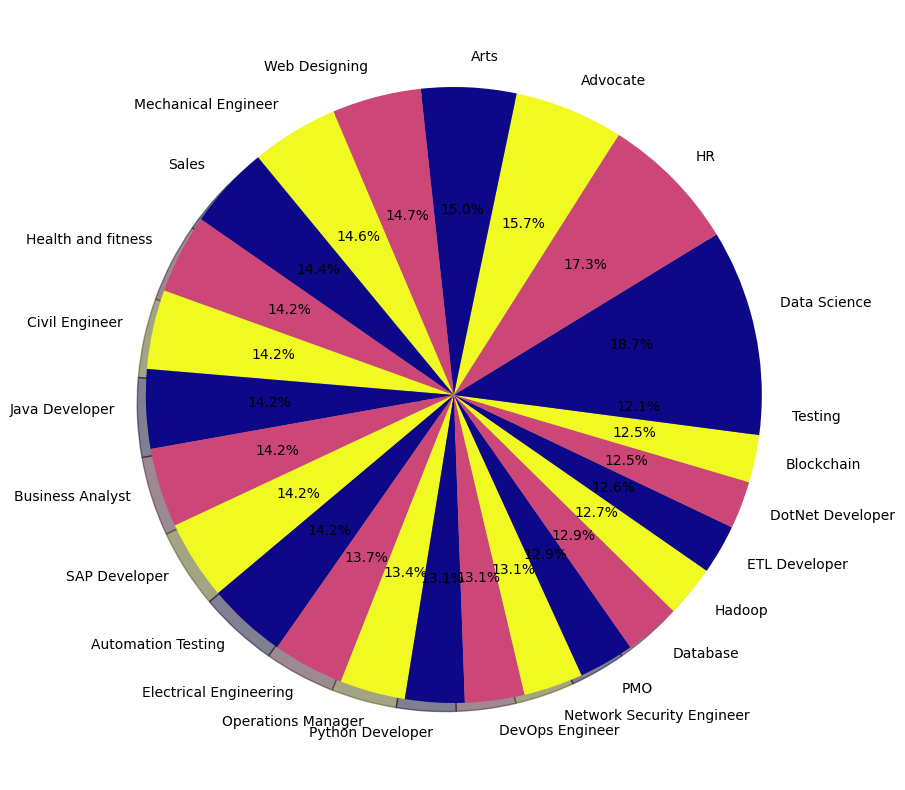

In [4]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='1%.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
import re

def cleanResume(cleanTxt):
    cleanTxt = re.sub('http\S+\s', ' ', cleanTxt)
    cleanTxt = re.sub('RT|cc', ' ', cleanTxt)
    cleanTxt = re.sub('#\S+\s', ' ', cleanTxt)
    cleanTxt = re.sub('@\S+', ' ', cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%^&*()_+-={}[]|\;:',./<>?~"""), ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)
    cleanTxt = re.sub('\s+', ' ', cleanTxt)
    cleaned_text = cleanTxt.lower()

    return cleaned_text


In [7]:
df['Resume'].apply(lambda x:cleanResume(x))
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText=tfidf.transform(df['Resume'])



In [10]:
df

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...
958,23,â Willingness to accept the challenges. â ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(requiredText,df['Category'],test_size=0.2,random_state=42)
x_train.shape

(769, 7384)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9844559585492227


In [13]:
import pickle

    
pickle.dump(tfidf,open('tfidf.pkl','wb'))



In [14]:
import pickle 
clf=pickle.load(open('clf.pkl','rb'))
cleaned_resume=cleanResume(myResume)
input_features=tfidf.transform([cleaned_resume])
prediction_id=clf.predict(input_features)[0]
category_mapping={
     15: "Java Developer",
     23: "Testing",
     8: "DevOps Engineer",
     20: "Python Developer",
     24: "Web Designing",
     12: "HR",
     13: "Hadoop",
     3: "Blockchain",
     10: "ETL Developer",
     18: "Operations Manager",
     6: "Data Science",
     22: "Sales",
     16: "Mechanical Engineer",
     1: "Arts",
     7: "Database",
     11: "Electrical Engineering",
     14: "Health and fitness",
     19: "PMO",
     4: "Business Analyst",
     9: "DotNet Developer",
     2: "Automation Testing",
     17: "Network Security Engineer",
     21: "SAP Developer",
     5: "Civil Engineer",
     0: "Advocate",
}
category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

    
    

FileNotFoundError: [Errno 2] No such file or directory: 'clf.pkl'

In [ ]:
df.Category.unique()